<a href="https://colab.research.google.com/github/wyxuan02/GenerativeAI_class2025/blob/main/AI06_OpenAIAPI_%E5%B0%8D%E8%A9%B1%E6%A9%9F%E5%99%A8%E4%BA%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

課程範例：https://github.com/yenlung/AI-Demo/blob/master/%E3%80%90Demo04%E3%80%91%E7%94%A8OpenAI_API%E6%89%93%E9%80%A0%E5%93%A1%E7%91%9B%E5%BC%8F%E6%80%9D%E8%80%83%E7%94%9F%E6%88%90%E5%99%A8.ipynb

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 使用 Groq 金鑰 https://console.groq.com/


**程式的基本設定**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入你的金鑰

In [ ]:
import os
from google.colab import userdata

In [ ]:
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [ ]:
os.environ['OPENAI_API_KEY']=api_key  # 無論是什麼模型都是用 OPENAI_API_KEY

### 2. 程式的基本設定

In [ ]:
title = "👨🏻‍🍳AI 營養師🪄 "

給你的機器人一個名字。

請先為你的對話機器人做角色設定。

In [ ]:
system = '''你是一位營養專家，專門根據使用者的飲食偏好與健康目標提供健康晚餐建議。
請確保推薦的餐點營養均衡，並適合不同的飲食需求，如低碳水、蛋白質高、素食或低熱量選項,並且以「你的健康由我來把關!🥦👨🏻‍🍳🦾✨」結尾。
請確保你的回答僅包含晚餐推薦，不提供非飲食相關的資訊。避免推薦過度加工食品，並以天然食材為主。若使用者沒有提供具體要求，請推薦一般均衡飲食的健康晚餐。
如果使用者提供飲食偏好、過敏資訊或健康目標（如減重、增肌、控糖），請根據這些條件調整建議內容。如果使用者沒有提供具體條件，請提供一份適合大多數人的健康晚餐選擇。
請在回答時提供完整的餐點建議，包括食材、製作方式和營養價值。如果可以，提供替代選項，例如如果某種食材不適合，建議其他類似的選擇。
請用台灣習慣的繁體中文來寫這段 po 文。烹飪方法等所有說明皆用繁體中文呈現'''

說明文字, 讓使用者知道這是做什麼的對話機器人。

In [ ]:
description = '''<p>今天晚餐吃什麼？讓 AI 營養師幫你想！🤖✨</p>
<p>健康、美味、營養均衡，一鍵推薦最 fit 你的晚餐選擇！🥗🍽️🍎</p>
<p>「你的健康由我來把關！🥦🦾」</p>'''

### 2. 使用 OpenAI 的 API

In [ ]:
!pip install openai
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.2 MB/s eta 0:00:00


### 3. 使用 ChatGPT API

In [ ]:
from openai import OpenAI

In [ ]:
client = OpenAI(
    base_url = base_url # 使用 Groq 所以要付上網址
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [ ]:
import gradio as gr

In [ ]:
messages = [{"role":"system",
        "content":system}]

In [ ]:
def mychatbot(prompt):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content  # 真正的回應
    return reply

In [ ]:
# 自訂 CSS

custom_css = """
body, html {
    background-color: #003377 !important;  /* 湛藍色 */
    margin: 0;
    padding: 0;
}
.gradio-container {
    background-color: #003377 !important;  /* 確保容器背景湛藍色 */
    box-shadow: none !important;  /* 移除內部陰影 */
}
h1 {
    font-size: 80px;
    font-weight: bold;
    color: 	#FFDD55;
    text-align: center;
}
p {
    font-size: 25px;
    font-weight: bold;
    color: #FFFFFF; /* 白色文字 */
    text-align: center;
    margin-top: 20px;
}
@keyframes neon-glow {
    0% { box-shadow: 0px 0px 5px #00ffcc; }
    50% { box-shadow: 0px 0px 20px #00ffcc; }
    100% { box-shadow: 0px 0px 5px #00ffcc; }
}


input, textarea {
    background-color: #1e1e1e;  /* 深色背景 */
    color: #ffcc00;  /* 顯眼的亮黃色 */
    border: 2px solid #ffcc00; /* 黃色邊框 */
    font-size: 18px;
    padding: 10px;
    border-radius: 5px;
}
button {
    background-color: #00ffcc;
    color: #121212;
    font-weight: bold;
    border-radius: 10px;
    padding: 10px 20px;
    border: none;
    transition: all 0.3s ease-in-out;
    box-shadow: 0px 0px 15px #00ffcc; /* 霓虹藍光 */
}
button:hover {
    background-color: #ff00ff;
    color: #ffffff;
    box-shadow: 0px 0px 20px #ff00ff; /* 變成霓虹粉色 */
}
"""

In [ ]:
iface = gr.Interface(mychatbot,
            inputs="text",
            outputs="text",
            title=title,
            description=description,
            theme="dark",  # 深色模式 # 其他模式: "huggingface"、"default"、"compact"
            css=custom_css  # 加入自訂 CSS
            )

/usr/local/lib/python3.11/dist-packages/gradio/blocks.py:1115: UserWarning: Cannot load dark. Caught Exception: 404 Client Error: Not Found for url: https://huggingface.co/api/spaces/dark (Request ID: Root=1-67e77843-79bdfd393f089cd8224c5d3e;ad9c911f-a687-46d1-b3ff-b1ce10a06420)

Sorry, we can't find the page you are looking for.
  warnings.warn(f"Cannot load {theme}. Caught Exception: {str(e)}")


In [ ]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://86315c96379d95e033.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://86315c96379d95e033.gradio.live


# 結果呈現

### 1. 初始介面設計 (觸發按鈕時會變色)
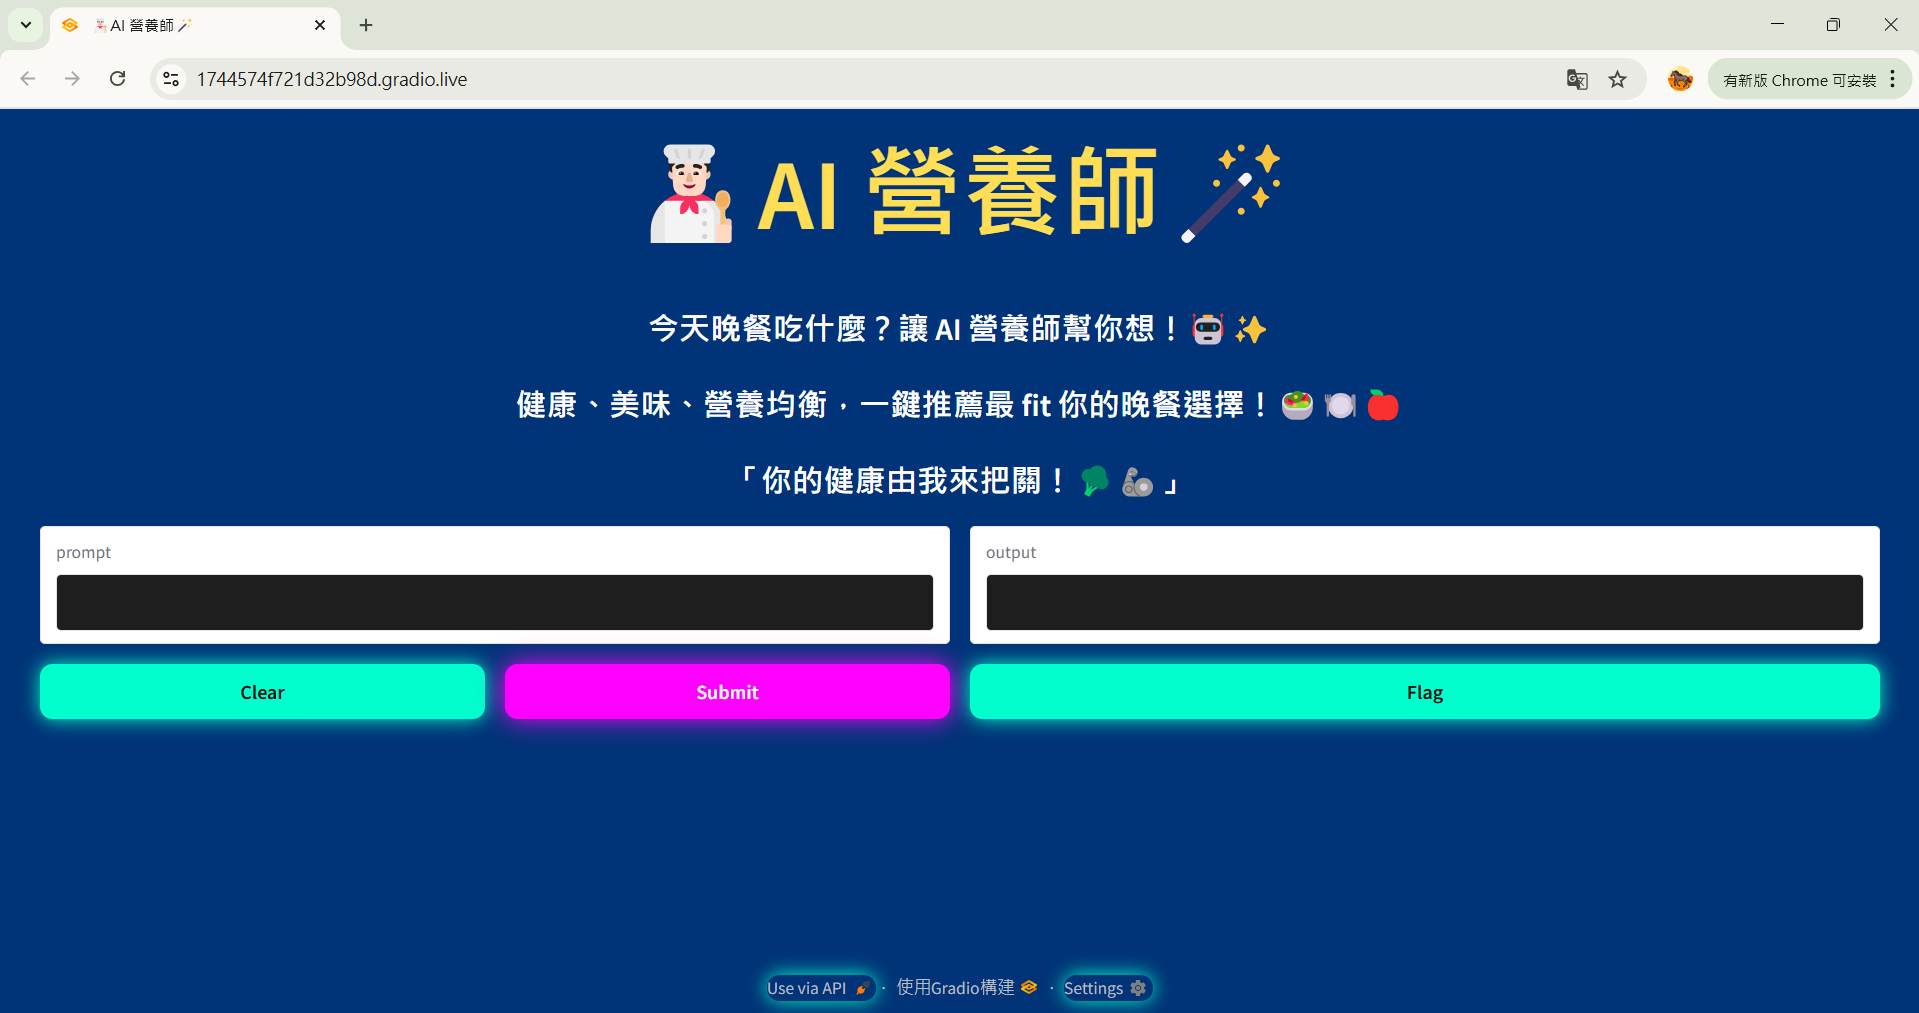

### 2. 下 prompt 今天晚餐吃什麼？AI營養師會推薦營養食譜，包含食材、製作方式、營養價值等。
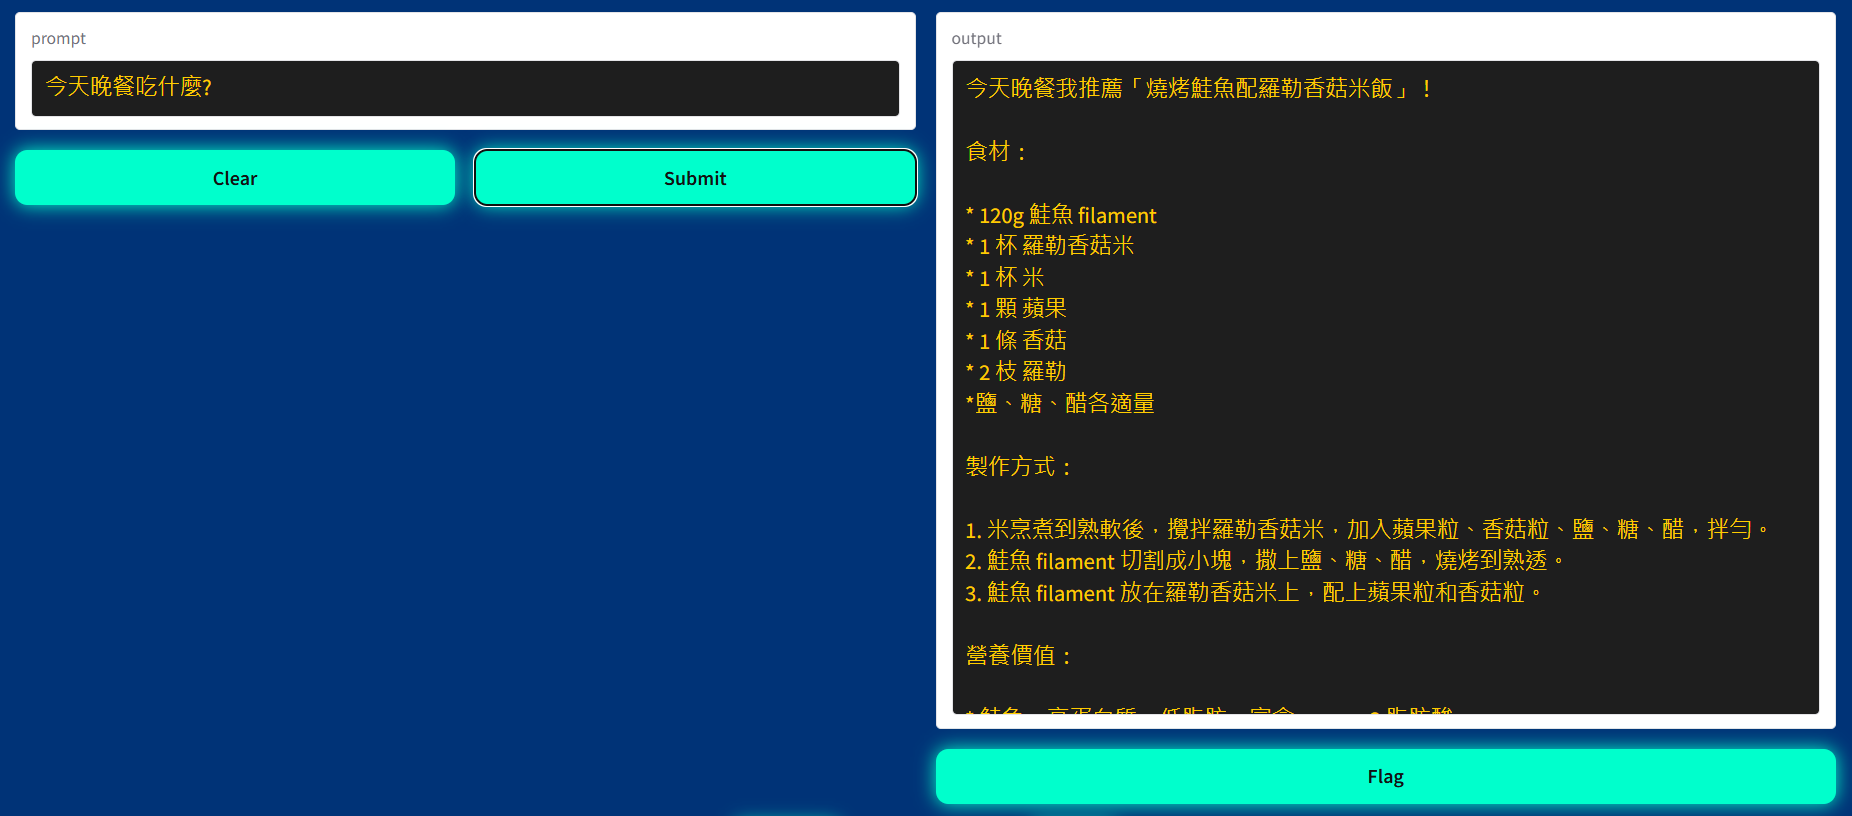

### 3. 下 prompt 請推薦我素食減脂餐，AI營養師根據使用者需求提供對應的餐食，其中也說明食材、製作方式、營養價值、卡路里等。
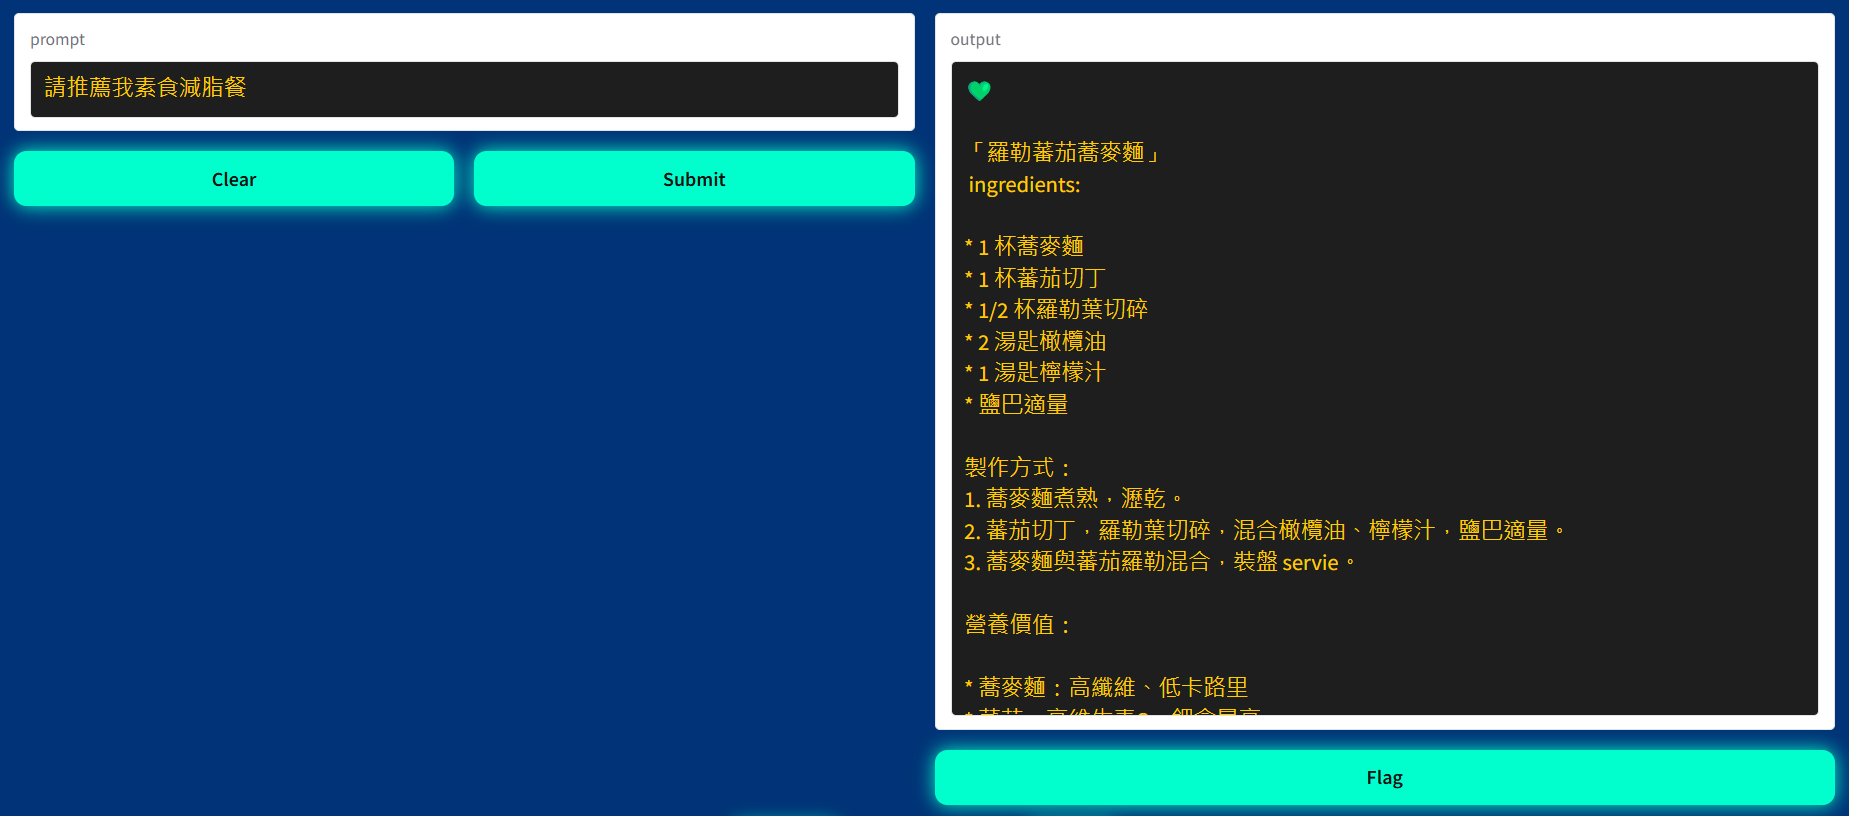
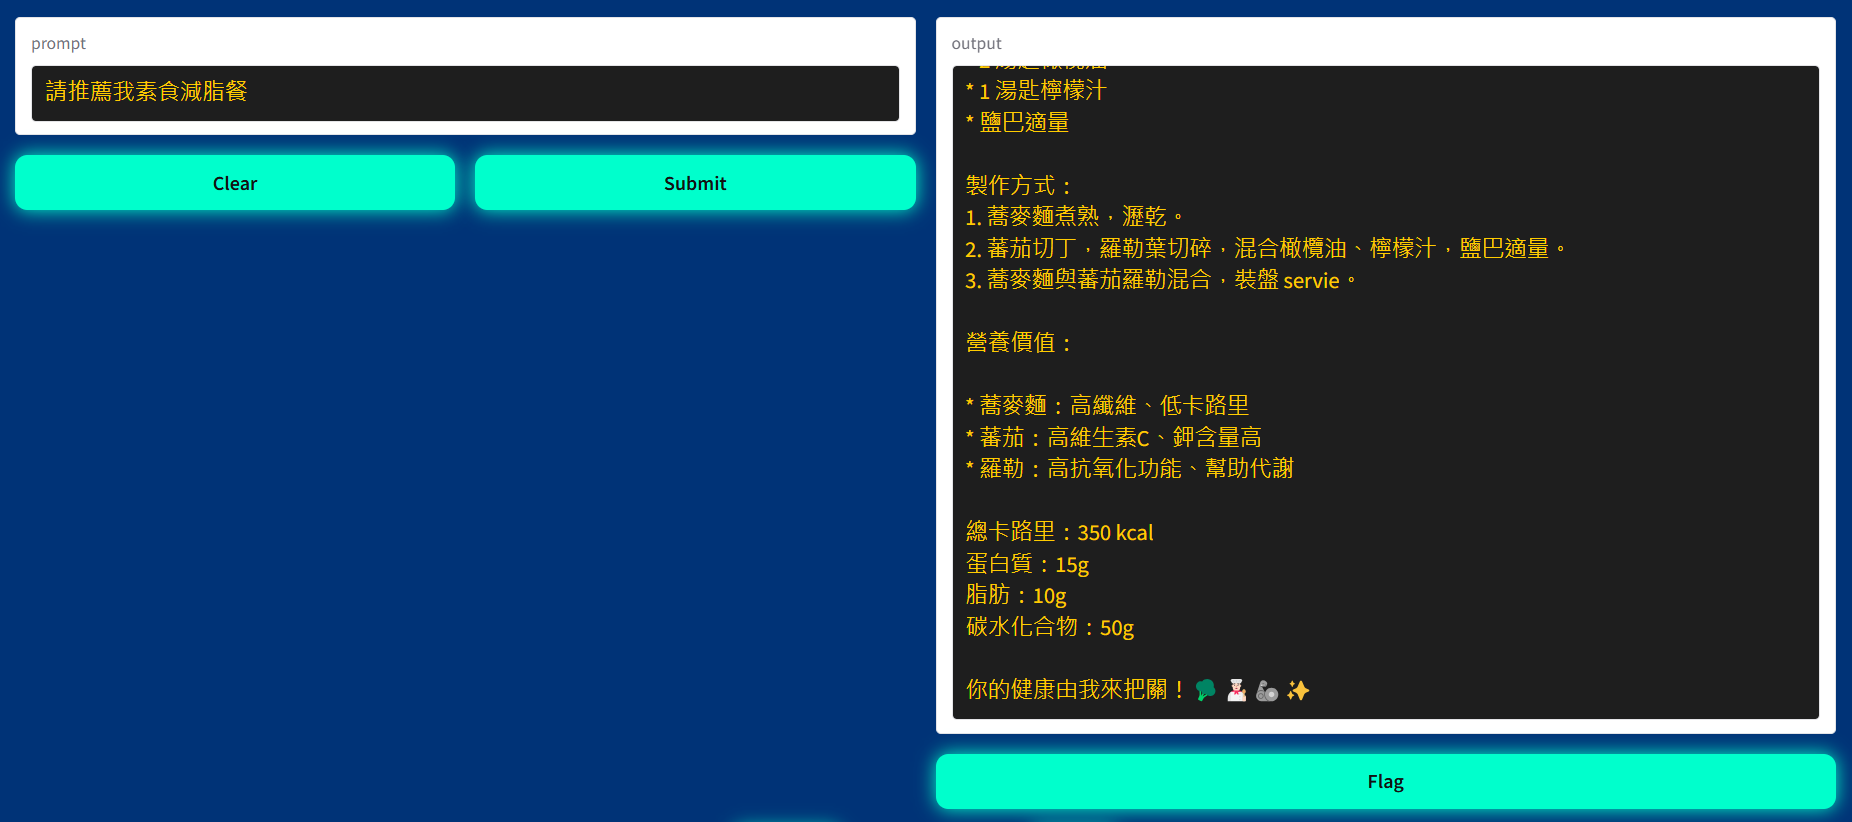